# CatFusion: Diffusion model for generating cat images

# loading the dataset

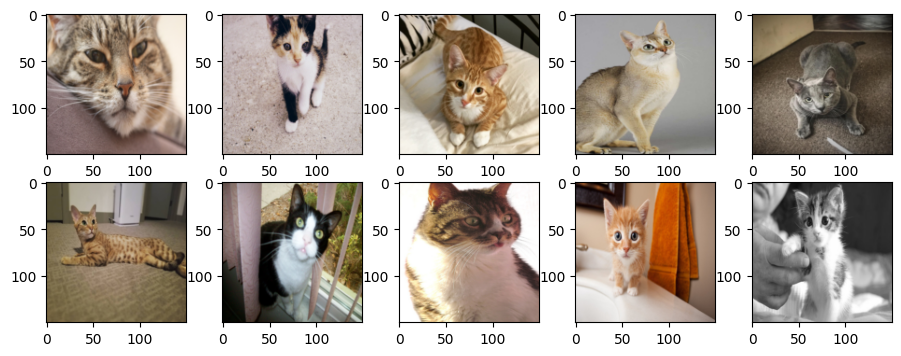

In [3]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

dataset = torch.load("datasets/cats.pth")

to_pil = transforms.ToPILImage()
fig = plt.figure(figsize=(11, 4))

columns = 5
rows = 2

for i in range(1,rows*columns + 1):
    fig.add_subplot(rows, columns, i)
    image, _ = dataset[i]
    plt.imshow(to_pil(image))

plt.show()

## Noise scheduler

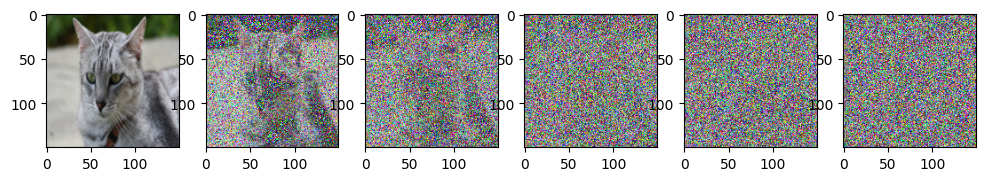

In [5]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from noise_scheduler import add_noise

columns = 6
rows = 1
to_pil = transforms.ToPILImage()

fig = plt.figure(figsize=(12, 3))

dataset = torch.load("datasets/cats.pth")
#data, _ = dataset[5]

def get_timestep(data, timestep):
    data = add_noise(data, torch.tensor(timestep), torch.tensor(1000))
    image = to_pil(data)
    return image

for i in range(1,rows*columns + 1):
    fig.add_subplot(rows, columns, i)
    data, _ = dataset[20]
    plt.imshow(get_timestep(data,200 * (i-1)))

plt.show()


Training

sample 0:


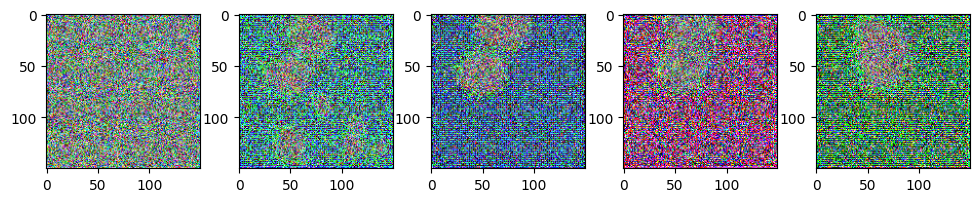

sample 100:


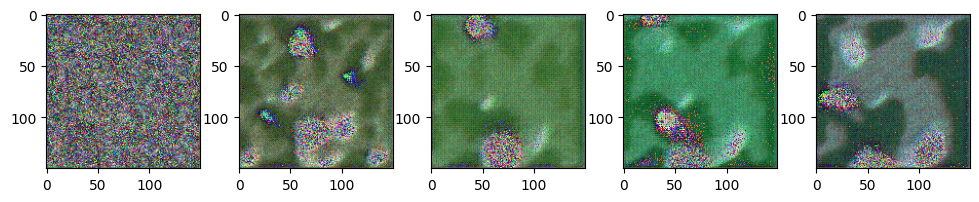

sample 200:


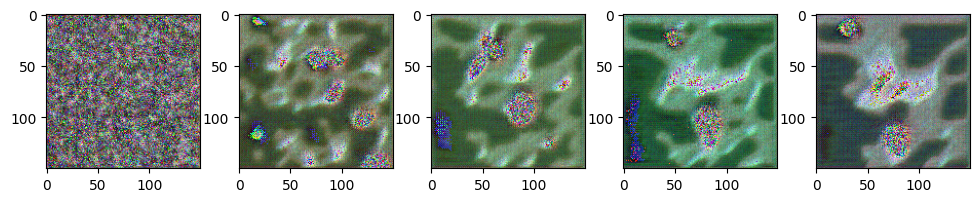

sample 300:


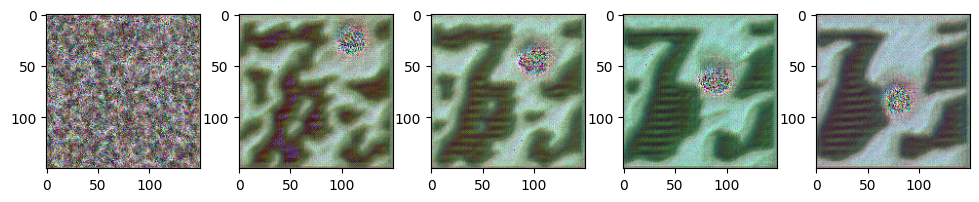

sample 400:


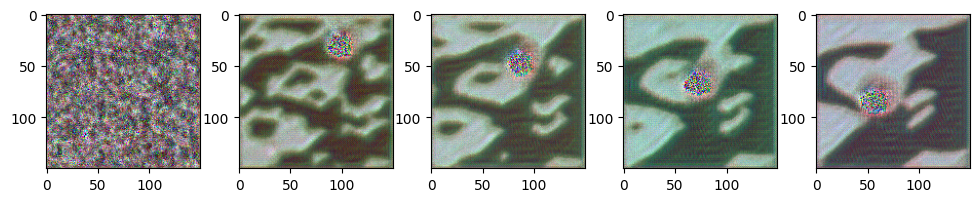

sample 500:


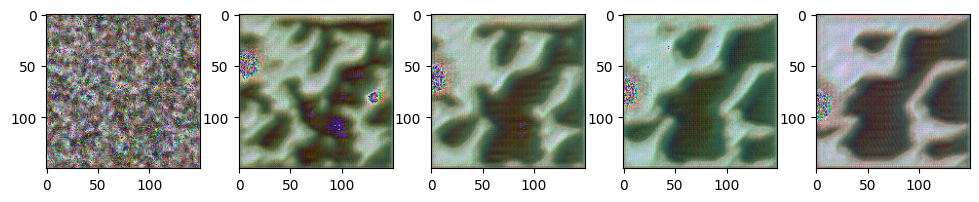

sample 0:


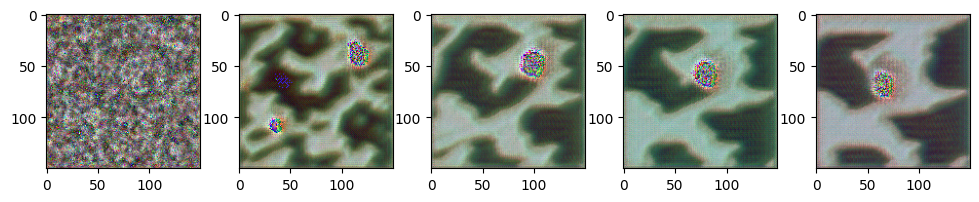

sample 100:


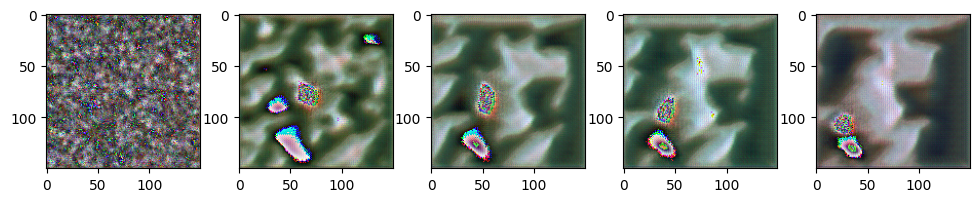

sample 200:


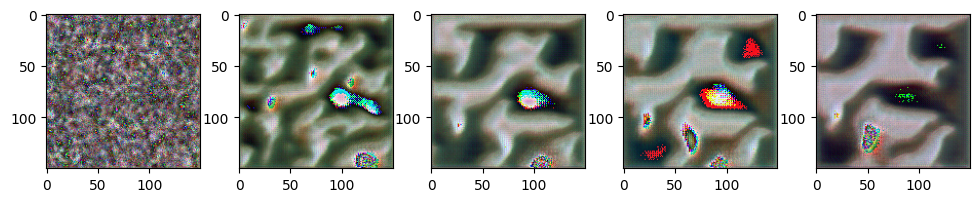

sample 300:


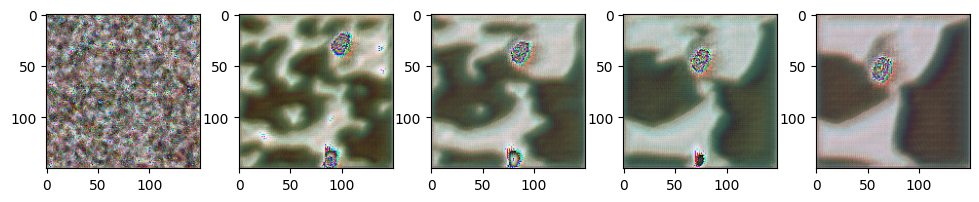

sample 400:


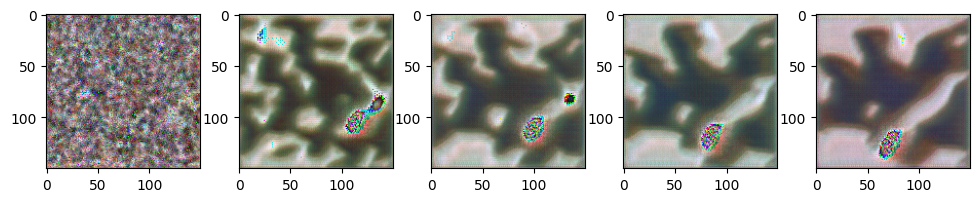

sample 500:


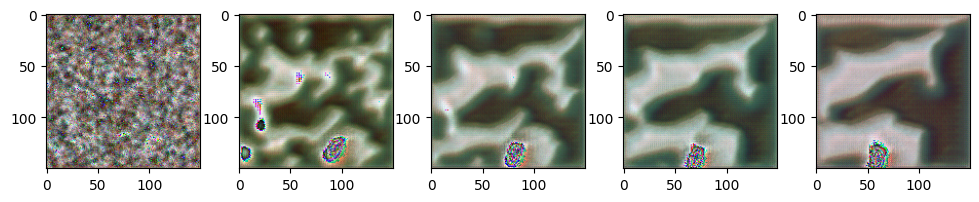

sample 0:


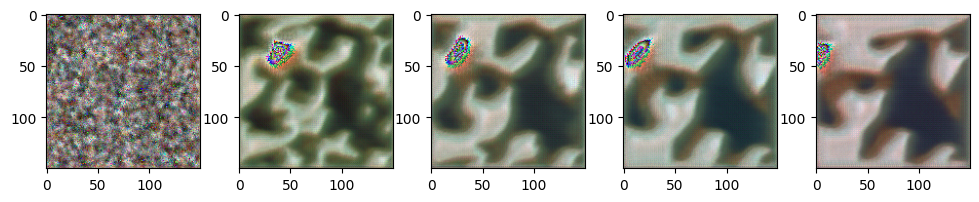

sample 100:


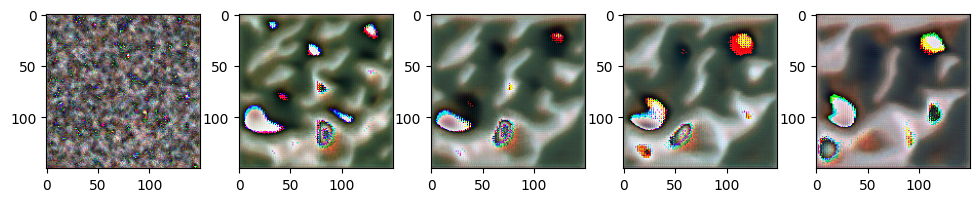

sample 200:


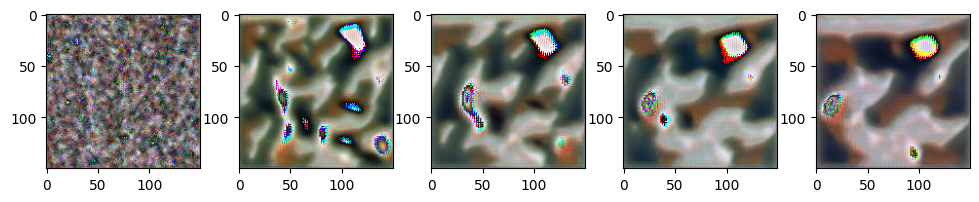

sample 300:


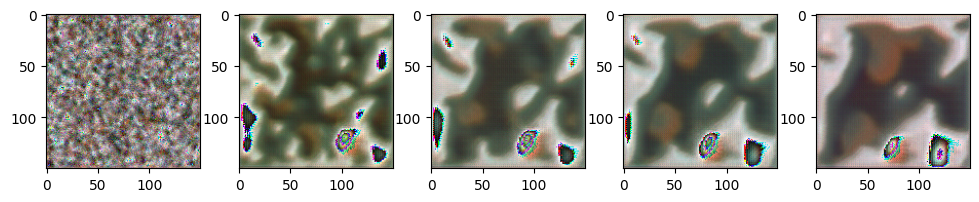

sample 400:


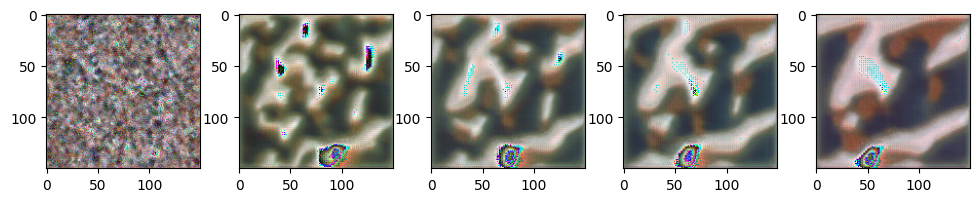

sample 500:


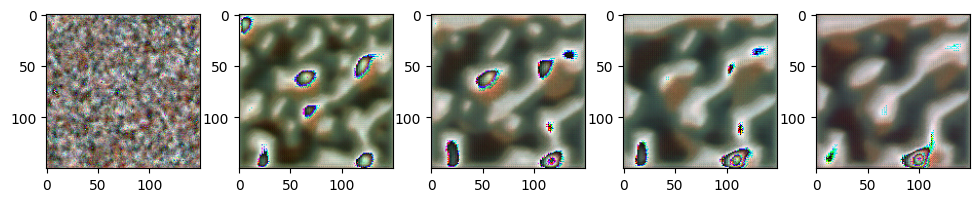

final image


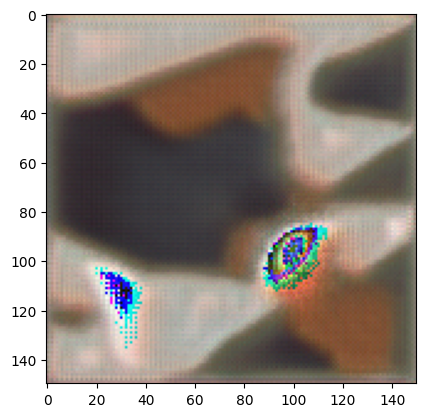

In [7]:
import torch
from torchvision import transforms
from model import DiffusionModel
import matplotlib.pyplot as plt
from train import train_sample
import gc

device = "cuda"

TOTAL_TIMESTEPS = 100
EPOCHS = 3

dataset = torch.load("datasets/cats.pth")
#dataset = torch.utils.data.Subset(dataset, range(500))

model = DiffusionModel(device=device)
model = model.to(device)

to_pil = transforms.ToPILImage()


def show_process_plot(model):
    model_process_images = []
    noise = torch.randn_like(dataset[0][0]).unsqueeze(0)
    noise = noise.to(device)
    for t in range(TOTAL_TIMESTEPS):
        noise = model(noise, torch.tensor(t).to(device))
        gc.collect()
        torch.cuda.empty_cache()
        noise = noise.clone().detach()
        if t % 20 == 0:
            model_process_images.append(noise)
    fig = plt.figure(figsize=(12, 2))
    for i in range(len(model_process_images)):
        fig.add_subplot(1, 5, i + 1)
        image = to_pil(model_process_images[i].squeeze(0))
        plt.imshow(image)
    plt.show()


for epoch in range(EPOCHS):
    for i, (data,_) in enumerate(dataset):
        model = train_sample(model, data.to(device), TOTAL_TIMESTEPS, device=device)
        gc.collect()
        torch.cuda.empty_cache()
        if i % 100 == 0:
            print(f"sample {i}:")
            show_process_plot(model)


noise = torch.randn_like(dataset[0][0]).unsqueeze(0)
noise = noise.to(device)


for t in range(TOTAL_TIMESTEPS):
    noise = model(noise, torch.tensor(t).to(device))
    gc.collect()
    torch.cuda.empty_cache()
    noise = noise.clone().detach()

img = to_pil(noise.squeeze(0))

plt.imshow(img)
print("final image")
plt.show()

model.save()
